<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Regresion%20lineal/SRT%20v2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v2.1 - Ensayo
### Regresion lineal - Datos reales | Nuevo Dataset

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv

--2023-05-08 13:37:01--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29796040 (28M) [text/plain]
Saving to: ‘alfanumerico_SRT.csv’

alfanumerico_SRT.cs 100%[===================>]  28.42M  76.9MB/s    in 0.4s    

2023-05-08 13:37:02 (76.9 MB/s) - ‘alfanumerico_SRT.csv’ saved [29796040/29796040]



In [3]:
df = pd.read_csv('/content/alfanumerico_SRT.csv', header=0, usecols=[1,2,3,4])
df

,codigo,año,mes,total_cp
0,X5001COC,1996,5,1
1,B1602EIB,1996,7,1
2,B1625XAF,1996,7,1
3,B1651FNF,1996,7,1
4,B1688GEV,1996,7,1
...,...,...,...,...
1166442,X5901AEA,2023,5,1
1166443,X5960FLM,2023,5,1
1166444,X5971ALF,2023,5,1
1166445,Y4500XAL,2023,5,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166447 entries, 0 to 1166446
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1166447 non-null  object
 1   año       1166447 non-null  int64 
 2   mes       1166447 non-null  int64 
 3   total_cp  1166447 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 35.6+ MB


#### Verificamos cantidad de registros por codigo

In [5]:
# codigos unicos
contador = df['codigo'].value_counts()
contador

B1900AWW    231
B1902CLF    217
G4200AAA    214
S2000AAA    212
S2000CMO    209
           ... 
B1610BTD      1
B1609KJN      1
B1609JIE      1
B1609IYA      1
X5011EKT      1
Name: codigo, Length: 205186, dtype: int64

### Transformacion

#### LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [8]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [9]:
X_encoded.shape

(1166447,)

In [10]:
pd.DataFrame(X_encoded)

,0
0,186027
1,3167
2,9514
3,15953
4,23396
...,...
1166442,201122
1166443,201875
1166444,202197
1166445,203307


#### Embeddings

In [11]:
tamano_embedding = 50

In [12]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [13]:
matriz_embedding

array([[0.96816371, 0.93758468, 0.38948106, ..., 0.17143422, 0.88603917,
        0.93205875],
       [0.22306354, 0.35983445, 0.47081963, ..., 0.63382831, 0.45076363,
        0.9464591 ],
       [0.14946386, 0.69639616, 0.1402103 , ..., 0.86148453, 0.4743558 ,
        0.83598385],
       ...,
       [0.06342481, 0.51185143, 0.00838859, ..., 0.54017127, 0.81496692,
        0.94410725],
       [0.58852922, 0.70386965, 0.3907768 , ..., 0.67982293, 0.70015458,
        0.26209943],
       [0.6843793 , 0.34590567, 0.39123602, ..., 0.16123538, 0.97713039,
        0.93410957]])

In [14]:
encoder.classes_

array(['A1262AAA', 'A1419AAA', 'A1425AAA', ..., 'Z9408ACK', 'Z9408ALA',
       'Z9420XAA'], dtype=object)

In [15]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [16]:
atributos_embeddings.shape

(1166447, 50)

#### Verificacion embeddings

In [17]:
i = 0
encoder.classes_[i]

'A1262AAA'

In [18]:
matriz_embedding[i]

array([0.96816371, 0.93758468, 0.38948106, 0.62672053, 0.45151559,
       0.92642319, 0.64681489, 0.02688904, 0.57197889, 0.06072357,
       0.76526622, 0.34912144, 0.7591483 , 0.77974822, 0.46621137,
       0.39905935, 0.27373208, 0.17637631, 0.87360615, 0.61339943,
       0.01661186, 0.55640886, 0.70755033, 0.37274249, 0.43758026,
       0.61304006, 0.94711872, 0.07727288, 0.2050791 , 0.8829261 ,
       0.7602431 , 0.6570614 , 0.07260154, 0.38264428, 0.9906531 ,
       0.05927165, 0.35681901, 0.76430168, 0.10358229, 0.61814321,
       0.56521233, 0.38506893, 0.14917067, 0.89160483, 0.05286176,
       0.50492011, 0.91173385, 0.17143422, 0.88603917, 0.93205875])

In [19]:
matriz_embedding.shape

(205186, 50)

#### Dataframe con datos de embeddings

In [20]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [21]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.968164,0.937585,0.389481,0.626721,0.451516,0.926423,0.646815,0.026889,0.571979,0.060724,...,0.565212,0.385069,0.149171,0.891605,0.052862,0.504920,0.911734,0.171434,0.886039,0.932059
1,0.223064,0.359834,0.470820,0.562450,0.826064,0.055083,0.847551,0.610366,0.297232,0.651408,...,0.664709,0.758913,0.003682,0.225162,0.073478,0.879092,0.527879,0.633828,0.450764,0.946459
2,0.149464,0.696396,0.140210,0.286059,0.976226,0.839884,0.786573,0.340529,0.893440,0.958741,...,0.611936,0.690146,0.942130,0.828409,0.405474,0.346542,0.843067,0.861485,0.474356,0.835984
3,0.044174,0.641840,0.997300,0.262543,0.020370,0.879082,0.419471,0.911128,0.599445,0.131402,...,0.087987,0.039248,0.168390,0.917941,0.860008,0.715313,0.770085,0.938901,0.587310,0.421455
4,0.536640,0.550453,0.694591,0.986078,0.877976,0.619710,0.182343,0.265353,0.887042,0.971863,...,0.341610,0.039087,0.053333,0.698535,0.053917,0.916838,0.078102,0.150925,0.931268,0.679617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205181,0.666783,0.514263,0.357121,0.492169,0.515707,0.643643,0.742734,0.044821,0.424117,0.231402,...,0.780228,0.362049,0.923887,0.386021,0.258789,0.287886,0.853145,0.509796,0.423807,0.628284
205182,0.539001,0.502199,0.087649,0.126165,0.029387,0.761067,0.169578,0.820873,0.031779,0.842086,...,0.784006,0.524954,0.562715,0.188329,0.519524,0.601124,0.121844,0.478805,0.468229,0.821234
205183,0.063425,0.511851,0.008389,0.608503,0.606703,0.885079,0.643367,0.675871,0.275788,0.377541,...,0.376640,0.581369,0.446214,0.095788,0.081950,0.153705,0.675139,0.540171,0.814967,0.944107
205184,0.588529,0.703870,0.390777,0.300726,0.716340,0.299795,0.158340,0.425253,0.913031,0.507682,...,0.383138,0.869155,0.527902,0.196184,0.065562,0.131401,0.126975,0.679823,0.700155,0.262099


In [22]:
embedding_df['codigo'] = encoder.classes_

In [23]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
A1262AAA,0.968164,0.937585,0.389481,0.626721,0.451516,0.926423,0.646815,0.026889,0.571979,0.060724,...,0.565212,0.385069,0.149171,0.891605,0.052862,0.504920,0.911734,0.171434,0.886039,0.932059
A1419AAA,0.223064,0.359834,0.470820,0.562450,0.826064,0.055083,0.847551,0.610366,0.297232,0.651408,...,0.664709,0.758913,0.003682,0.225162,0.073478,0.879092,0.527879,0.633828,0.450764,0.946459
A1425AAA,0.149464,0.696396,0.140210,0.286059,0.976226,0.839884,0.786573,0.340529,0.893440,0.958741,...,0.611936,0.690146,0.942130,0.828409,0.405474,0.346542,0.843067,0.861485,0.474356,0.835984
A1669AAA,0.044174,0.641840,0.997300,0.262543,0.020370,0.879082,0.419471,0.911128,0.599445,0.131402,...,0.087987,0.039248,0.168390,0.917941,0.860008,0.715313,0.770085,0.938901,0.587310,0.421455
A1712AAA,0.536640,0.550453,0.694591,0.986078,0.877976,0.619710,0.182343,0.265353,0.887042,0.971863,...,0.341610,0.039087,0.053333,0.698535,0.053917,0.916838,0.078102,0.150925,0.931268,0.679617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9407XAJ,0.666783,0.514263,0.357121,0.492169,0.515707,0.643643,0.742734,0.044821,0.424117,0.231402,...,0.780228,0.362049,0.923887,0.386021,0.258789,0.287886,0.853145,0.509796,0.423807,0.628284
Z9408ACJ,0.539001,0.502199,0.087649,0.126165,0.029387,0.761067,0.169578,0.820873,0.031779,0.842086,...,0.784006,0.524954,0.562715,0.188329,0.519524,0.601124,0.121844,0.478805,0.468229,0.821234
Z9408ACK,0.063425,0.511851,0.008389,0.608503,0.606703,0.885079,0.643367,0.675871,0.275788,0.377541,...,0.376640,0.581369,0.446214,0.095788,0.081950,0.153705,0.675139,0.540171,0.814967,0.944107


In [24]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
X5001COC,1996,5,1
B1602EIB,1996,7,1
B1625XAF,1996,7,1
B1651FNF,1996,7,1
B1688GEV,1996,7,1
...,...,...,...
X5901AEA,2023,5,1
X5960FLM,2023,5,1
X5971ALF,2023,5,1


In [25]:
df.total_cp.max()

1824

#### Transformar la variable de salida

In [26]:
mmscaler = MinMaxScaler()

In [27]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [28]:
df.head()

,año,mes,total_cp
codigo,,,
X5001COC,1996,5,0.0
B1602EIB,1996,7,0.0
B1625XAF,1996,7,0.0
B1651FNF,1996,7,0.0
B1688GEV,1996,7,0.0


#### Joins de Dataframes

In [29]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
A1262AAA,0.968164,0.937585,0.389481,0.626721,0.451516,0.926423,0.646815,0.026889,0.571979,0.060724,...,0.891605,0.052862,0.504920,0.911734,0.171434,0.886039,0.932059,2014,2,0.000000
A1419AAA,0.223064,0.359834,0.470820,0.562450,0.826064,0.055083,0.847551,0.610366,0.297232,0.651408,...,0.225162,0.073478,0.879092,0.527879,0.633828,0.450764,0.946459,2014,12,0.001646
A1425AAA,0.149464,0.696396,0.140210,0.286059,0.976226,0.839884,0.786573,0.340529,0.893440,0.958741,...,0.828409,0.405474,0.346542,0.843067,0.861485,0.474356,0.835984,2014,10,0.001097
A1669AAA,0.044174,0.641840,0.997300,0.262543,0.020370,0.879082,0.419471,0.911128,0.599445,0.131402,...,0.917941,0.860008,0.715313,0.770085,0.938901,0.587310,0.421455,2014,11,0.000000
A1712AAA,0.536640,0.550453,0.694591,0.986078,0.877976,0.619710,0.182343,0.265353,0.887042,0.971863,...,0.698535,0.053917,0.916838,0.078102,0.150925,0.931268,0.679617,2013,11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9408ACJ,0.539001,0.502199,0.087649,0.126165,0.029387,0.761067,0.169578,0.820873,0.031779,0.842086,...,0.188329,0.519524,0.601124,0.121844,0.478805,0.468229,0.821234,2022,6,0.000000
Z9408ACK,0.063425,0.511851,0.008389,0.608503,0.606703,0.885079,0.643367,0.675871,0.275788,0.377541,...,0.095788,0.081950,0.153705,0.675139,0.540171,0.814967,0.944107,2012,10,0.000000
Z9408ALA,0.588529,0.703870,0.390777,0.300726,0.716340,0.299795,0.158340,0.425253,0.913031,0.507682,...,0.196184,0.065562,0.131401,0.126975,0.679823,0.700155,0.262099,2011,3,0.000000


#### Datos de entrenamiento

In [30]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,A1262AAA,0.968164,0.937585,0.389481,0.626721,0.451516,0.926423,0.646815,0.026889,0.571979,...,0.891605,0.052862,0.504920,0.911734,0.171434,0.886039,0.932059,2014,2,0.000000
1,A1419AAA,0.223064,0.359834,0.470820,0.562450,0.826064,0.055083,0.847551,0.610366,0.297232,...,0.225162,0.073478,0.879092,0.527879,0.633828,0.450764,0.946459,2014,12,0.001646
2,A1425AAA,0.149464,0.696396,0.140210,0.286059,0.976226,0.839884,0.786573,0.340529,0.893440,...,0.828409,0.405474,0.346542,0.843067,0.861485,0.474356,0.835984,2014,10,0.001097
3,A1669AAA,0.044174,0.641840,0.997300,0.262543,0.020370,0.879082,0.419471,0.911128,0.599445,...,0.917941,0.860008,0.715313,0.770085,0.938901,0.587310,0.421455,2014,11,0.000000
4,A1712AAA,0.536640,0.550453,0.694591,0.986078,0.877976,0.619710,0.182343,0.265353,0.887042,...,0.698535,0.053917,0.916838,0.078102,0.150925,0.931268,0.679617,2013,11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166442,Z9408ACJ,0.539001,0.502199,0.087649,0.126165,0.029387,0.761067,0.169578,0.820873,0.031779,...,0.188329,0.519524,0.601124,0.121844,0.478805,0.468229,0.821234,2022,6,0.000000
1166443,Z9408ACK,0.063425,0.511851,0.008389,0.608503,0.606703,0.885079,0.643367,0.675871,0.275788,...,0.095788,0.081950,0.153705,0.675139,0.540171,0.814967,0.944107,2012,10,0.000000
1166444,Z9408ALA,0.588529,0.703870,0.390777,0.300726,0.716340,0.299795,0.158340,0.425253,0.913031,...,0.196184,0.065562,0.131401,0.126975,0.679823,0.700155,0.262099,2011,3,0.000000
1166445,Z9420XAA,0.684379,0.345906,0.391236,0.630562,0.814213,0.940786,0.072237,0.077466,0.426119,...,0.635468,0.441365,0.975768,0.617400,0.161235,0.977130,0.934110,2009,11,0.000000


In [31]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [32]:
X_data.shape

(1166447, 52)

In [33]:
y_data = df_final['total_cp'].to_numpy()

In [34]:
y_data

array([0.        , 0.00164564, 0.00109709, ..., 0.        , 0.        ,
       0.        ])

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [36]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [37]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

In [38]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [39]:
mse_train, mse_test

(1.9846520546411873e-05, 2.060597862064762e-05)

In [40]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.0045 0.0045


In [41]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.00249


No es un buen resultado

### Prediccion

In [42]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [43]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [44]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [45]:
atributos_in = atributos_in.reshape(1, 52)

In [46]:
pred = modelo.predict(atributos_in)

In [47]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [49]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {round(pred[0][0])} incidentes")  

Prediccion para el código C1437HIE Año 2023 Mes 6: 2 incidentes


### Verificacion grafica

In [50]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
604805,C1437HIE,0.603969,0.343151,0.578372,0.863479,0.951637,0.717214,0.84174,0.040009,0.99958,...,0.408938,0.690239,0.17521,0.869722,0.252383,0.264494,0.43806,2018,4,0.0
604806,C1437HIE,0.603969,0.343151,0.578372,0.863479,0.951637,0.717214,0.84174,0.040009,0.99958,...,0.408938,0.690239,0.17521,0.869722,0.252383,0.264494,0.43806,2018,12,0.0
604807,C1437HIE,0.603969,0.343151,0.578372,0.863479,0.951637,0.717214,0.84174,0.040009,0.99958,...,0.408938,0.690239,0.17521,0.869722,0.252383,0.264494,0.43806,2019,3,0.0
604808,C1437HIE,0.603969,0.343151,0.578372,0.863479,0.951637,0.717214,0.84174,0.040009,0.99958,...,0.408938,0.690239,0.17521,0.869722,0.252383,0.264494,0.43806,2020,2,0.0
604809,C1437HIE,0.603969,0.343151,0.578372,0.863479,0.951637,0.717214,0.84174,0.040009,0.99958,...,0.408938,0.690239,0.17521,0.869722,0.252383,0.264494,0.43806,2020,3,0.0


In [51]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [52]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [53]:
fechas[0]

'2018-4-01'

In [54]:
totales = mmscaler.inverse_transform([totales])

In [55]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

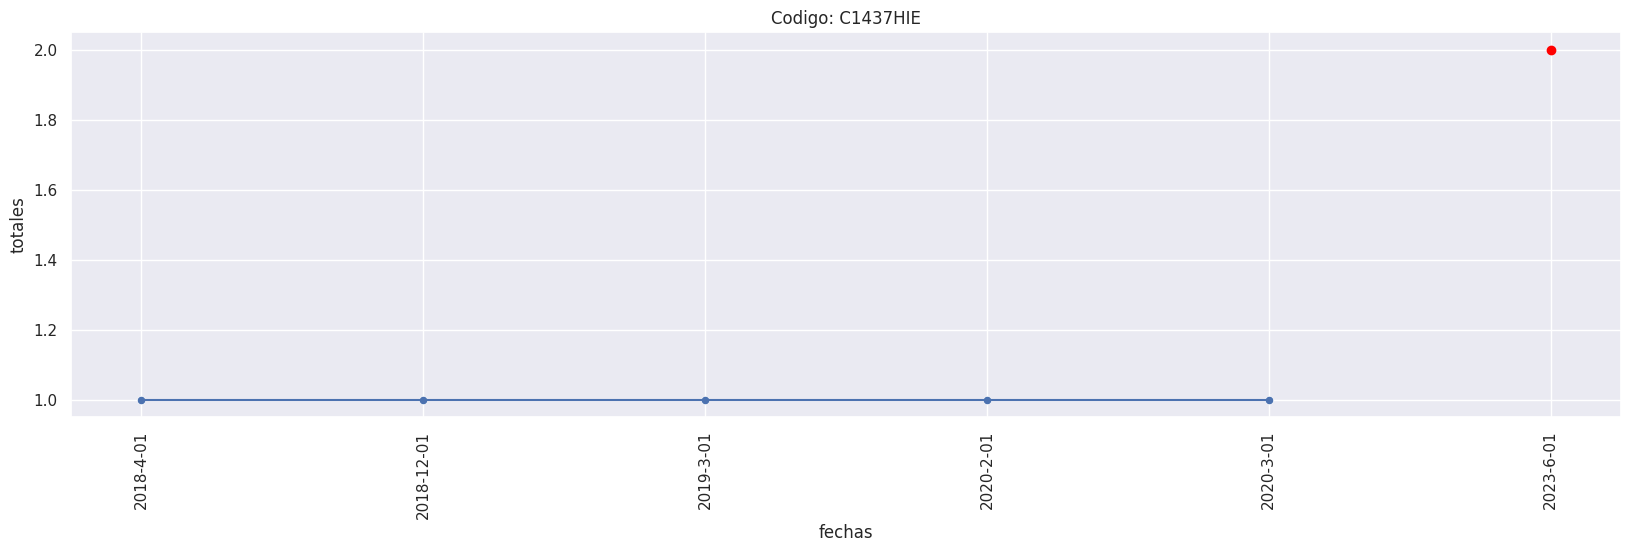

In [57]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y= round(pred[0][0]), color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()

### Funcion de prediccion

In [64]:
def estimador(codigo=0, anio_in=2023, mes_in=6):
  
  if codigo == 0:
    # Genera codigo aleatorio
    codigo_in = random.choice(encoder.classes_) 
    new_codigo_in = encoder.transform([codigo_in])
    new_codigo_embedding = matriz_embedding[new_codigo_in]
  
  atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)
  atributos_in = atributos_in.reshape(1, 52)
  pred = modelo.predict(atributos_in)
  pred = mmscaler.inverse_transform(pred.reshape(-1, 1))
  print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {round(pred[0][0])} incidentes")  
  filtro = df_final['codigo'] == codigo_in
  df_filtrado = df_final[filtro]
  df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)
  
  fechas = []
  totales = []
  for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])
  totales = mmscaler.inverse_transform([totales])
  df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

  plt.figure(figsize=(20, 5))
  sns.set(color_codes=True)
  plt.xticks(rotation=90)
  sns.scatterplot(x='fechas', y='totales', data=df_graf)
  plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=round(pred[0][0]), color='red')
  plt.plot(df_graf.fechas, df_graf.totales)
  plt.title("Codigo: "+codigo_in)
  plt.show()

  return

Prediccion para el código T4000BSJ Año 2023 Mes 5: 3 incidentes


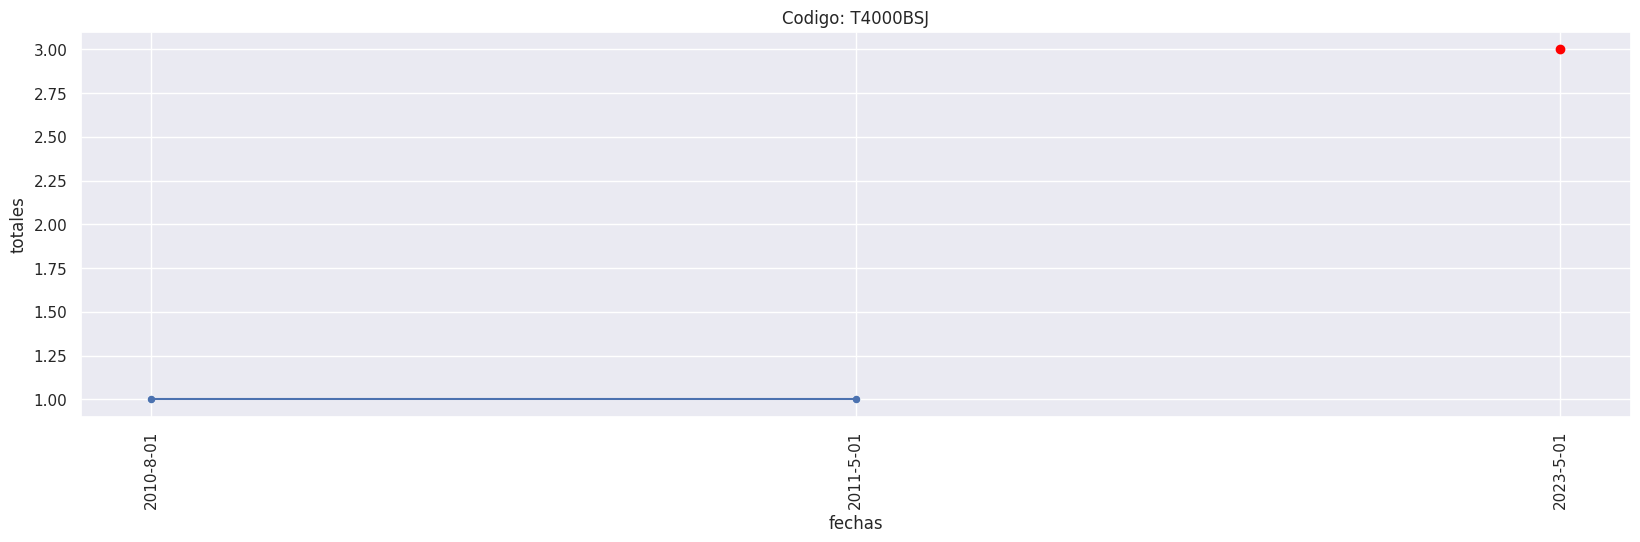

In [68]:
estimador(0, 2023, 5)